<a href="https://colab.research.google.com/github/BirasaDivine/Maternal_Health_Risk_Mobile-App-Regression/blob/main/MobileApp_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [482]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pickle
from warnings import filterwarnings
filterwarnings('ignore')

In [483]:
data=pd.read_csv('Maternal Health Risk Data Set.csv')

In [484]:
print(data.columns)

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')


In [485]:
data.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [486]:
print(data.shape)

(1014, 7)


In [487]:
print("\nMATERNAL RISK ANALYSIS\n")

low_cols = []

for col in data.columns:
    unique_count = data[col].nunique(dropna=True)

    if unique_count <= 10:
        low_cols.append(col)

        print(f"{col}: unique={unique_count}")
        print(data[col].value_counts(dropna=False))
        print("-" * 40)

print("Detected low-maternal-risk columns (<=10 unique values):", low_cols)



MATERNAL RISK ANALYSIS

BodyTemp: unique=8
BodyTemp
98.0     804
101.0     98
102.0     66
100.0     20
103.0     13
99.0      10
98.4       2
98.6       1
Name: count, dtype: int64
----------------------------------------
RiskLevel: unique=3
RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64
----------------------------------------
Detected low-maternal-risk columns (<=10 unique values): ['BodyTemp', 'RiskLevel']


In [488]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [489]:
print(data['RiskLevel'].unique())


['high risk' 'low risk' 'mid risk']


In [490]:
data['RiskLevel'] = data['RiskLevel'].map({'mid risk': 0, 'high risk': 1 , 'low risk' : 2})


In [491]:
data.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,1
1,35,140,90,13.00,98.0,70,1
2,29,90,70,8.00,100.0,80,1
3,30,140,85,7.00,98.0,70,1
4,35,120,60,6.10,98.0,76,2
5,23,140,80,7.01,98.0,70,1
6,23,130,70,7.01,98.0,78,0
7,35,85,60,11.00,102.0,86,1
8,32,120,90,6.90,98.0,70,0
9,42,130,80,18.00,98.0,70,1


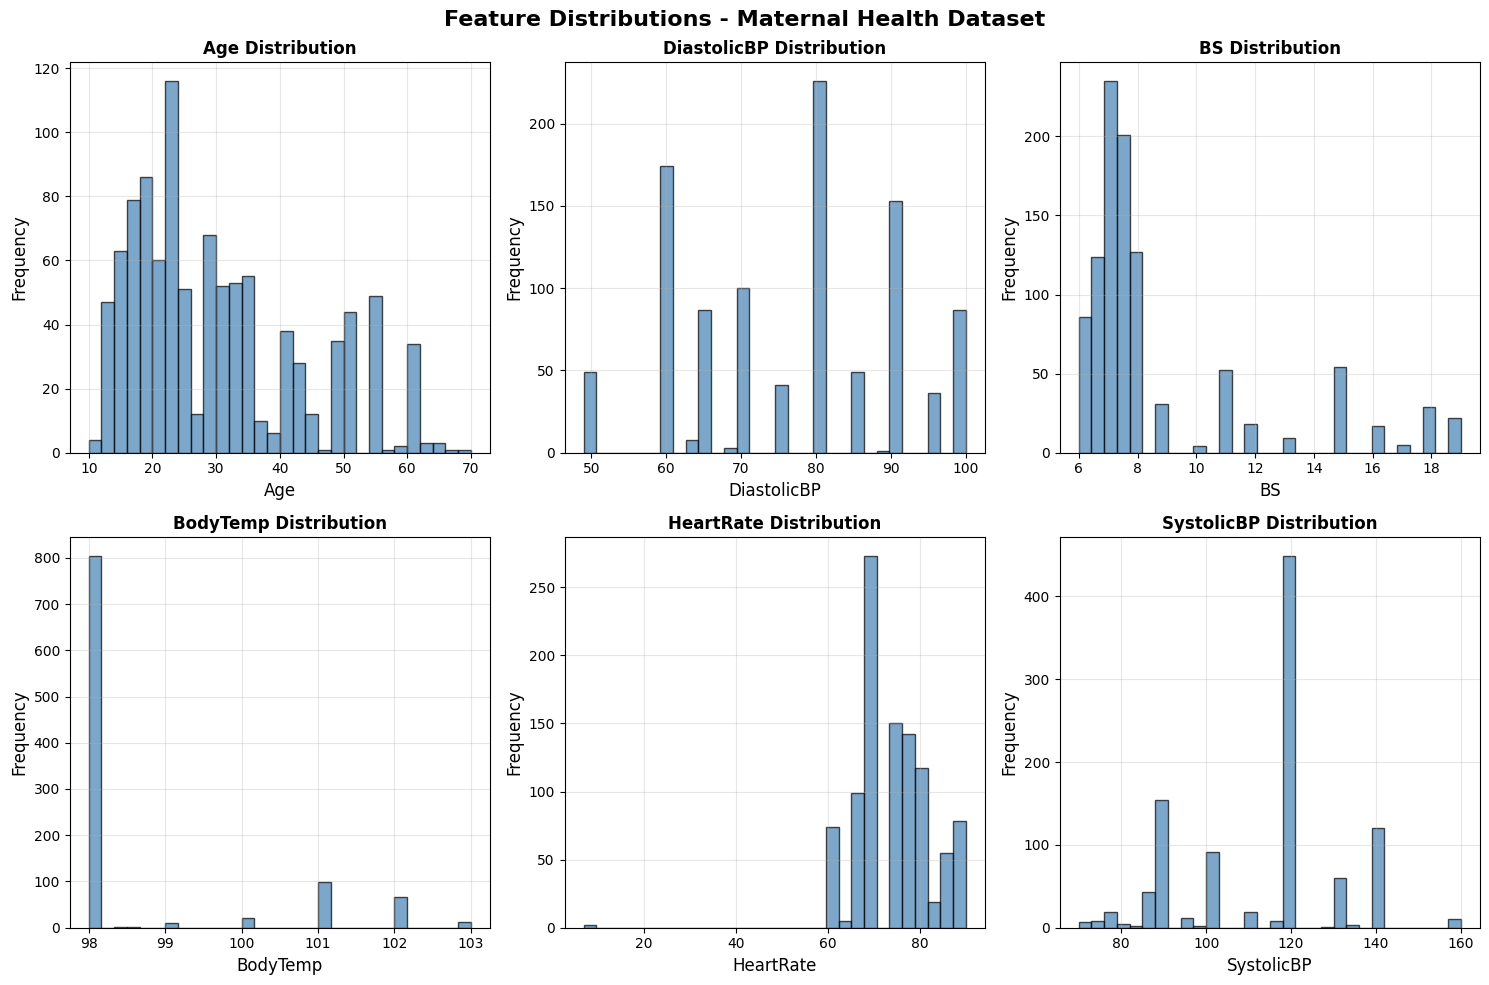

In [492]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Distributions - Maternal Health Dataset',
             fontsize=16, fontweight='bold')

features = ['Age', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'SystolicBP']

for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    # Histogram with KDE
    ax.hist(data[feature], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(f'{feature} Distribution', fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
# SAVE the figure
plt.savefig("feature_distributions.png", dpi=300, bbox_inches='tight')
plt.show()

In [493]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [494]:
data.duplicated().sum()

np.int64(562)

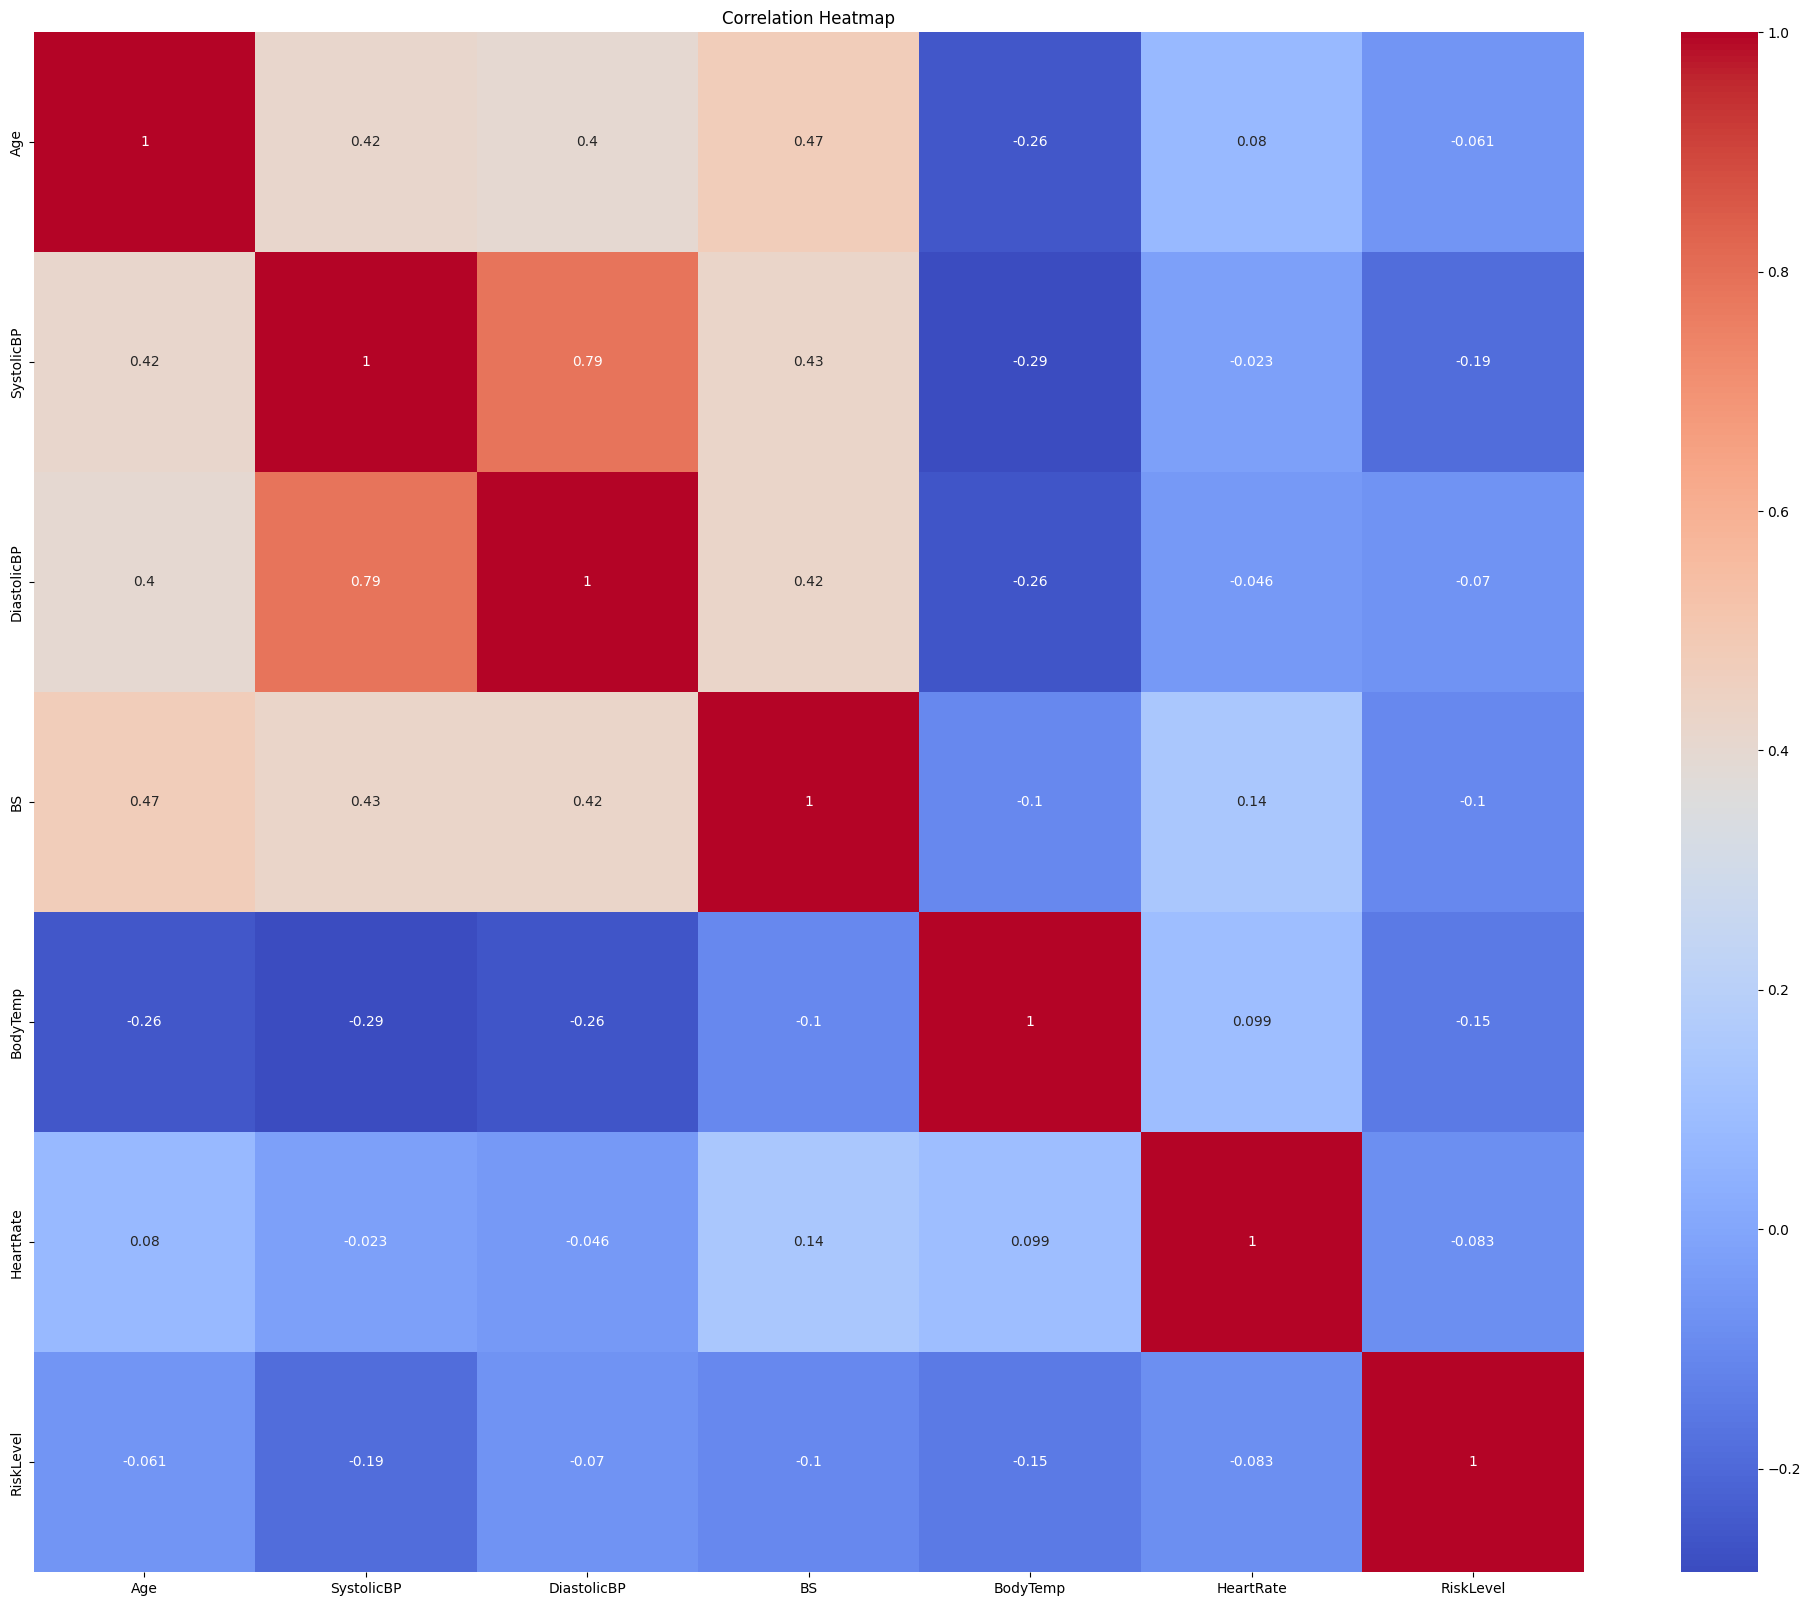

In [495]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
# Save the heatmap
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


<Axes: xlabel='SystolicBP', ylabel='DiastolicBP'>

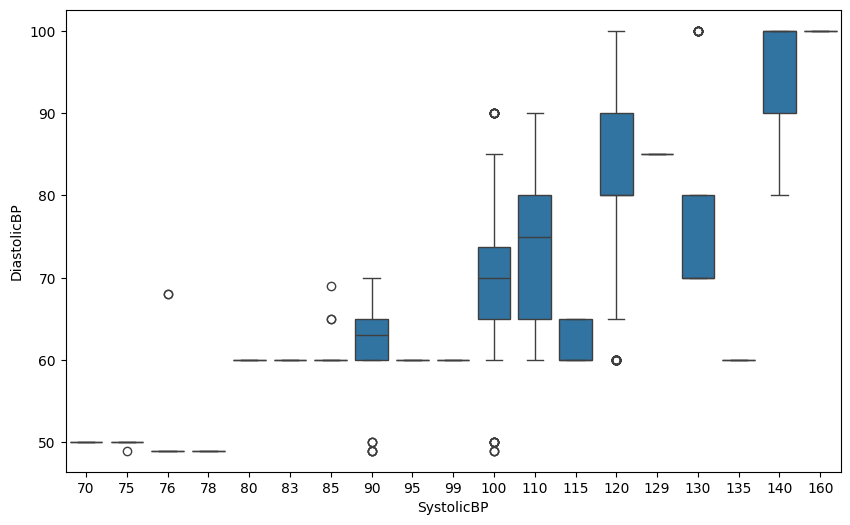

In [496]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['SystolicBP'], y=data['DiastolicBP'], data=data)

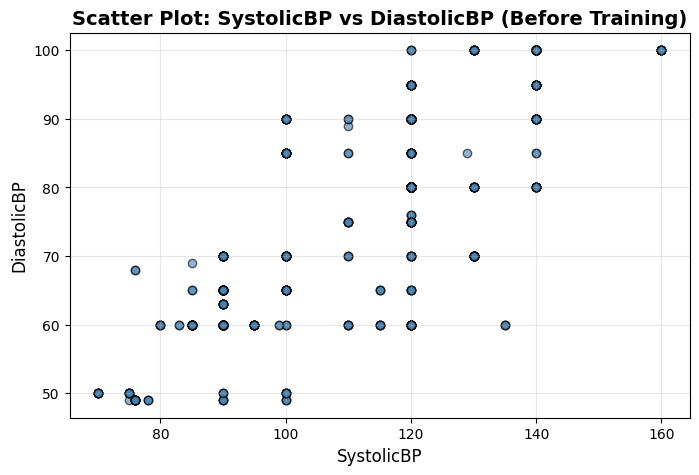

In [497]:
plt.figure(figsize=(8, 5))
plt.scatter(data["SystolicBP"], data["DiastolicBP"],
            alpha=0.6, color="steelblue", edgecolors="black")

plt.xlabel("SystolicBP", fontsize=12)
plt.ylabel("DiastolicBP", fontsize=12)
plt.title("Scatter Plot: SystolicBP vs DiastolicBP (Before Training)", fontsize=14, fontweight="bold")
plt.grid(True, alpha=0.3)
plt.savefig("scatter_systolic_diastolic.png", dpi=300, bbox_inches='tight')
plt.show()


In [498]:
X = data.drop(columns=['RiskLevel', 'SystolicBP'])
y = data['SystolicBP']

In [499]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [500]:
# Scale the features for Gradient Descent
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [501]:
sgd_lr = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd_lr.fit(X_train_scaled, y_train)

SGDRegressor(random_state=42)

In [502]:
sgd = SGDRegressor(
    max_iter=1,           # One iteration per "epoch"
    learning_rate='constant',
    eta0=0.01,
    warm_start=True,      # Keep previous weights for next epoch
    random_state=42
)

In [503]:
n_epochs = 100
train_losses = []
test_losses = []

for epoch in range(n_epochs):
    sgd.fit(X_train_scaled, y_train)  # Continues training from previous epoch

    # Predictions
    y_train_pred = sgd.predict(X_train_scaled)
    y_test_pred = sgd.predict(X_test_scaled)

    # Compute and record MSE
    train_losses.append(mean_squared_error(y_train, y_train_pred))
    test_losses.append(mean_squared_error(y_test, y_test_pred))

In [504]:
# Final predictions with trained model
y_pred_sgd = sgd.predict(X_test_scaled)


# Metrics
mse = mean_squared_error(y_test, y_pred_sgd)
mae = mean_absolute_error(y_test, y_pred_sgd)
r2 = r2_score(y_test, y_pred_sgd)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

MSE: 127.90403191158724
MAE: 9.0863501090936
R²: 0.6047360567890675


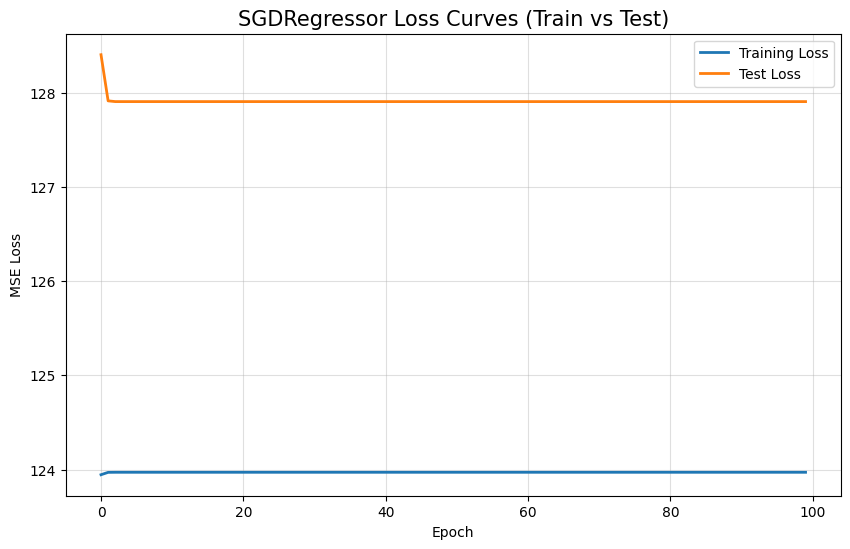

In [505]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Training Loss", linewidth=2)
plt.plot(test_losses, label="Test Loss", linewidth=2)
plt.title("SGDRegressor Loss Curves (Train vs Test)", fontsize=15)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

In [506]:
RandomF = RandomForestRegressor()
RandomF.fit(X_train, y_train)
y_pred = RandomF.predict(X_test)

In [507]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 15.62009196081667
Mean Absolute Error: 1.8310764346490946
R-squared: 0.9517289717182836


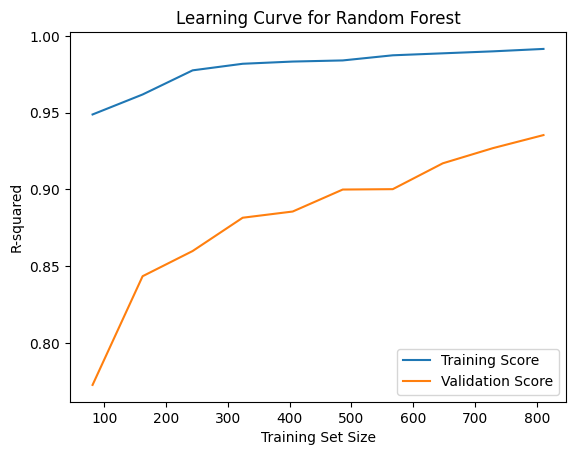

In [508]:
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(n_estimators=100), X, y, cv=5, scoring='r2', n_jobs=1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.title('Learning Curve for Random Forest')
plt.legend()
plt.show()

In [509]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [510]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 14.070607553366175
Mean Absolute Error: 0.7733990147783252
R-squared: 0.9565173689851977


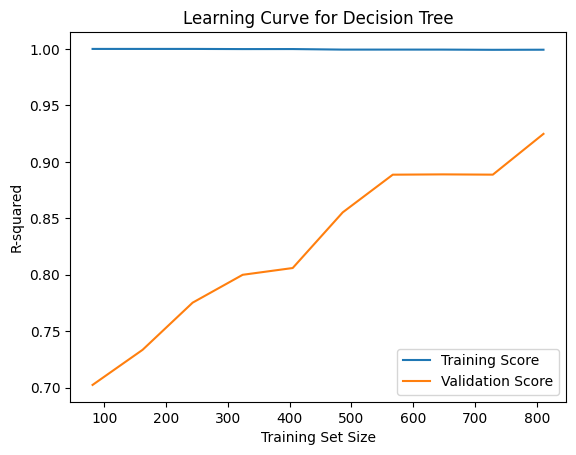

In [511]:
train_sizes, train_scores, test_scores = learning_curve(
    DecisionTreeRegressor(), X, y, cv=5, scoring='r2', n_jobs=1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.title('Learning Curve for Decision Tree')
plt.legend()
plt.show()

                     Model         MSE       MAE        R²
0  Linear Regression (SGD)  122.102691  8.878903  0.622664
1            Decision Tree   14.070608  0.773399  0.956517
2            Random Forest   15.620092  1.831076  0.951729


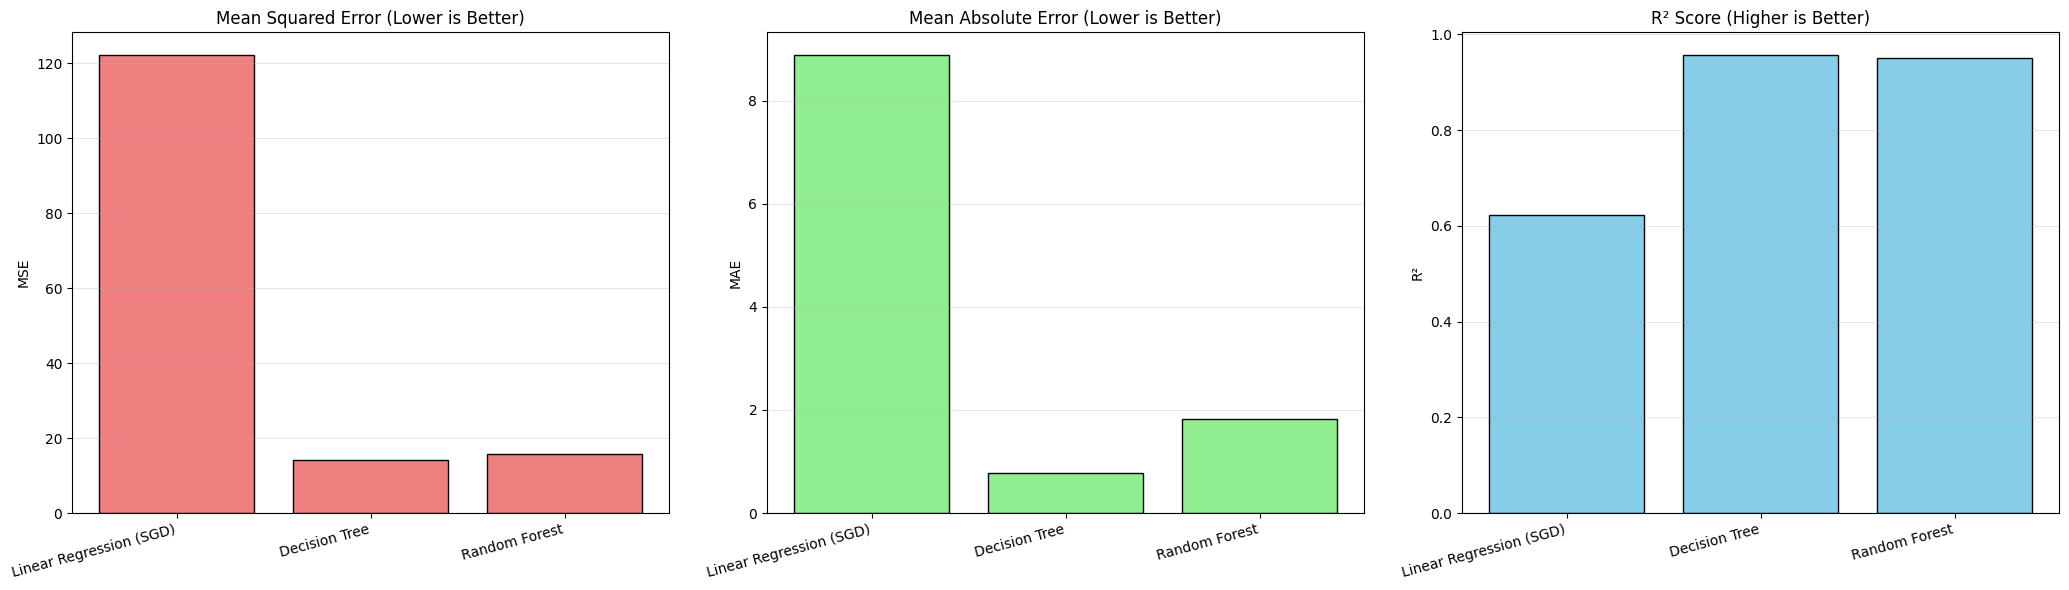

In [512]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# Predictions for all models
# -----------------------------
y_pred_sgd = sgd_lr.predict(X_test_scaled)  # SGD Linear Regression (scaled)
y_pred_dt  = decision_tree.predict(X_test)  # Decision Tree
y_pred_rf  = RandomF.predict(X_test)        # Random Forest

# -----------------------------
# Compute metrics
# -----------------------------
metrics = {
    'Model': ['Linear Regression (SGD)', 'Decision Tree', 'Random Forest'],
    'MSE': [
        mean_squared_error(y_test, y_pred_sgd),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf)
    ],
    'MAE': [
        mean_absolute_error(y_test, y_pred_sgd) ,
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    'R²': [
        r2_score(y_test, y_pred_sgd),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ]
}

comparison_metrics = pd.DataFrame(metrics)
print(comparison_metrics)

# -----------------------------
# Plotting metrics
# -----------------------------
x_pos = np.arange(len(comparison_metrics))

fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# --- MSE ---
axes[0].bar(x_pos, comparison_metrics['MSE'], color='lightcoral', edgecolor='black')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(comparison_metrics['Model'], rotation=15, ha='right')
axes[0].set_title('Mean Squared Error (Lower is Better)')
axes[0].set_ylabel('MSE')
axes[0].grid(axis='y', alpha=0.3)

# --- MAE ---
axes[1].bar(x_pos, comparison_metrics['MAE'], color='lightgreen', edgecolor='black')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(comparison_metrics['Model'], rotation=15, ha='right')
axes[1].set_title('Mean Absolute Error (Lower is Better)')
axes[1].set_ylabel('MAE')
axes[1].grid(axis='y', alpha=0.3)

# --- R² ---
axes[2].bar(x_pos, comparison_metrics['R²'], color='skyblue', edgecolor='black')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(comparison_metrics['Model'], rotation=15, ha='right')
axes[2].set_title('R² Score (Higher is Better)')
axes[2].set_ylabel('R²')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


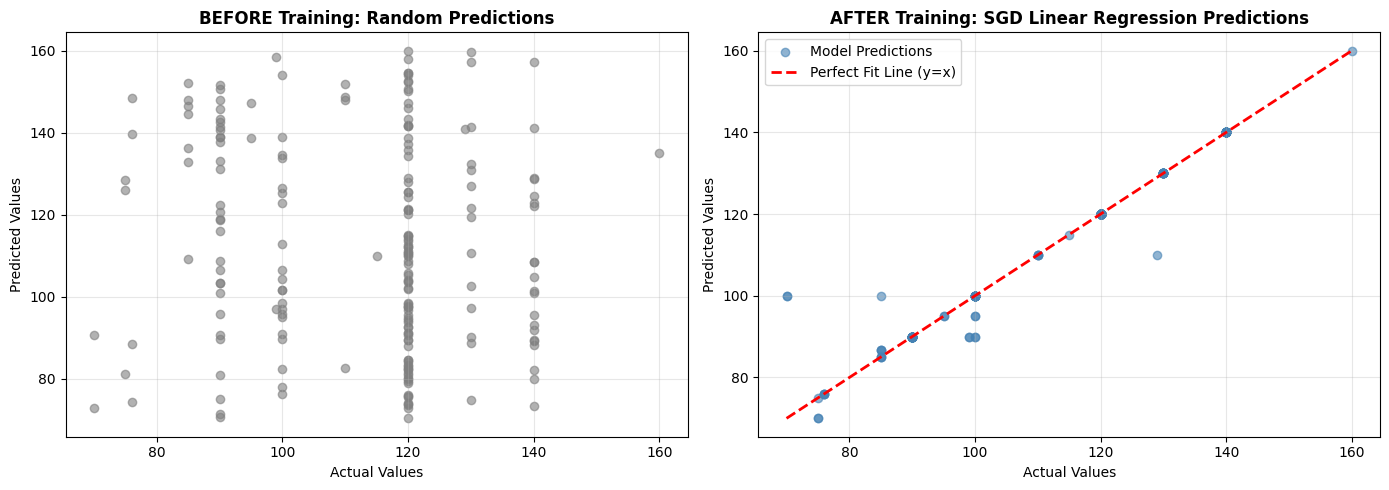

In [513]:

# BEFORE TRAINING: random predictions
random_predictions = np.random.uniform(y_test.min(), y_test.max(), len(y_test))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# BEFORE: random predictions
axes[0].scatter(y_test, random_predictions, alpha=0.6, color="gray")
axes[0].set_title("BEFORE Training: Random Predictions", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].grid(True, alpha=0.3)

# AFTER: SGD Linear Regression predictions
axes[1].scatter(y_test, y_pred, alpha=0.6, color="steelblue", label="Model Predictions")

# Add perfect fit line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
axes[1].plot([min_val, max_val], [min_val, max_val], "r--", linewidth=2, label="Perfect Fit Line (y=x)")

axes[1].set_title("AFTER Training: SGD Linear Regression Predictions", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


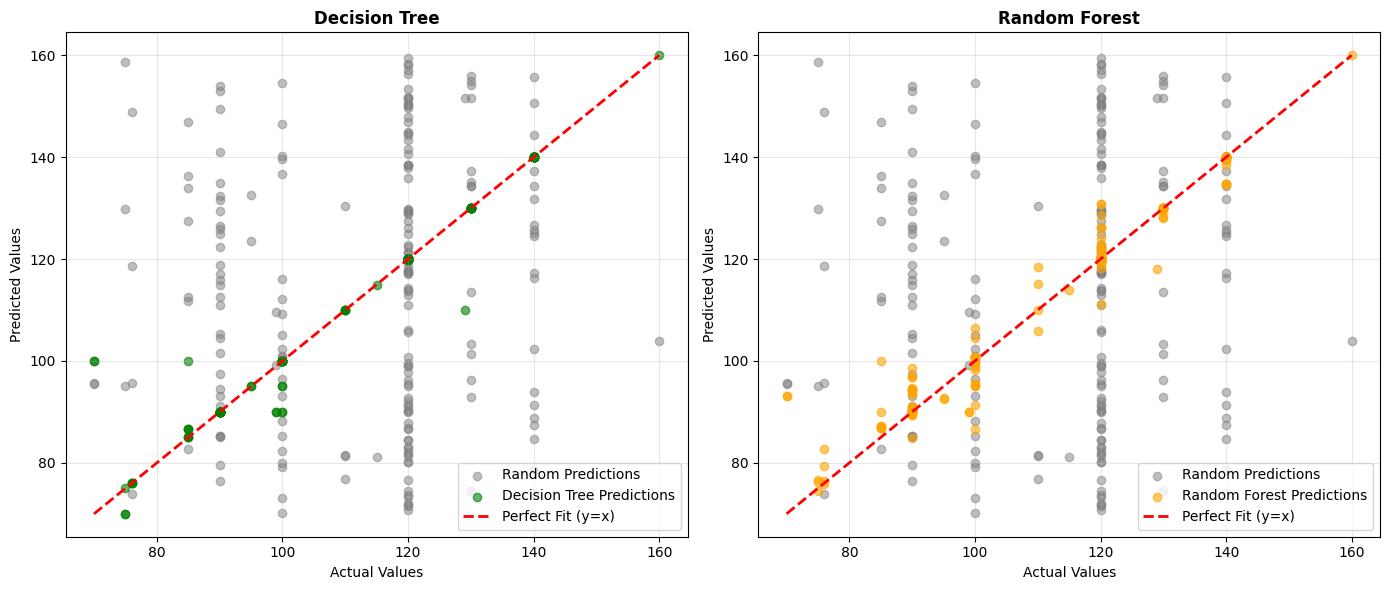

In [514]:

# Predictions
y_pred_dt  = decision_tree.predict(X_test)       # Decision Tree
y_pred_rf  = RandomF.predict(X_test)            # Random Forest

y_test_array = y_test.values.ravel() if isinstance(y_test, pd.DataFrame) else y_test

# Random predictions to simulate "before training"
random_predictions = np.random.uniform(y_test_array.min(), y_test_array.max(), len(y_test_array))
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Decision Tree ---
axes[0].scatter(y_test_array, random_predictions, alpha=0.5, color='gray', label='Random Predictions')
axes[0].scatter(y_test_array, y_pred_dt, alpha=0.6, color='green', label='Decision Tree Predictions')
axes[0].plot([y_test_array.min(), y_test_array.max()],
             [y_test_array.min(), y_test_array.max()],
             'r--', linewidth=2, label='Perfect Fit (y=x)')
axes[0].set_title("Decision Tree", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# --- Random Forest ---
axes[1].scatter(y_test_array, random_predictions, alpha=0.5, color='gray', label='Random Predictions')
axes[1].scatter(y_test_array, y_pred_rf, alpha=0.6, color='orange', label='Random Forest Predictions')
axes[1].plot([y_test_array.min(), y_test_array.max()],
             [y_test_array.min(), y_test_array.max()],
             'r--', linewidth=2, label='Perfect Fit (y=x)')
axes[1].set_title("Random Forest", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("before_after_tree_rf.png", dpi=300, bbox_inches='tight')
plt.show()


In [515]:
pipeline = {
    'model': decision_tree,
    'scaler': scaler,
    'feature_columns': X.columns.tolist()
}

with open('model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [516]:
# loading the best model (decision tree)
with open("model.pkl", "rb") as file:
    best_loaded_model = pickle.load(file)


In [517]:
# Example: make predictions on X_test
input_data = {
    "Age": [120],
    "DiastolicBP": [40],
    "BS": [30],
    "BodyTemp": [95],
    "HeartRate": [30]
}

X_test_single = pd.DataFrame(input_data)
y_pred = best_loaded_model['model'].predict(X_test_single)
print(y_pred)


[90.]
